# H02A5A Computer Vision Project - Incisor Segmentation

## Imports

In [1]:
%matplotlib inline
import numpy as np
import cv2
from incisorseg.dataset import Dataset
from incisorseg.utils import *
from asm.shape import Shape
from asm.shapemodel import ShapeModel
from asm.greymodel import GreyModel

## Reading the dataset

In [2]:
data = Dataset('../../data/')

## Sample plots

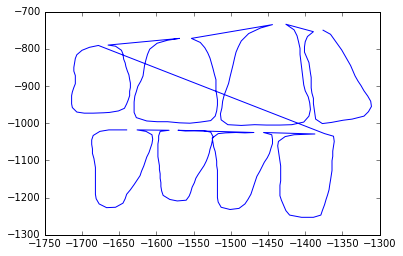

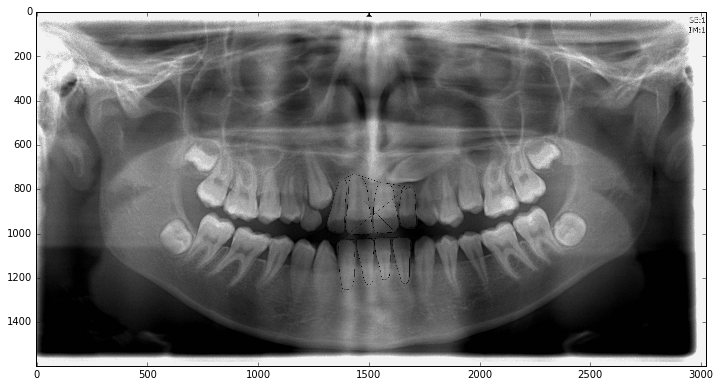

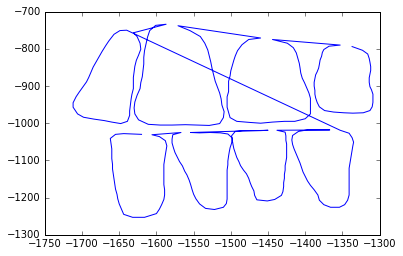

(1597, 3023)


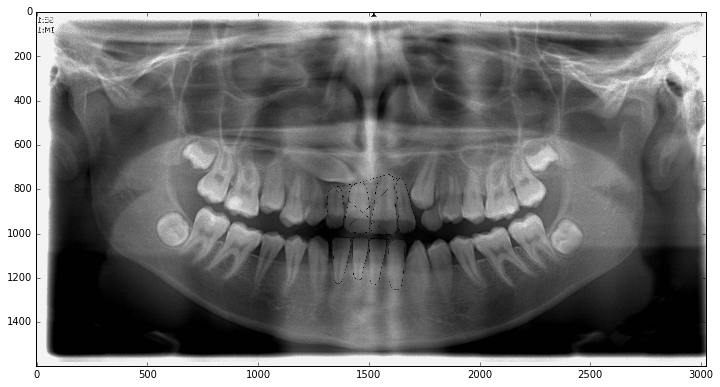

In [3]:
img,mimg = data.get_training_images([0])
l,ml = data.get_training_image_landmarks([0],Dataset.ALL_TEETH)
lc,mlc = data.get_training_image_landmarks([0],Dataset.ALL_TEETH,True)
plot_shapes(lc)
imshow2(overlay_shapes_on_image(img[0],lc))
plot_shapes(mlc)
imshow2(overlay_shapes_on_image(mimg[0],mlc))
print img[0].shape

## Shape Model
All 8 teeth

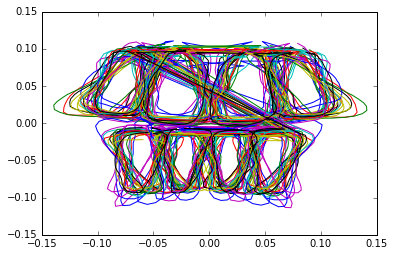

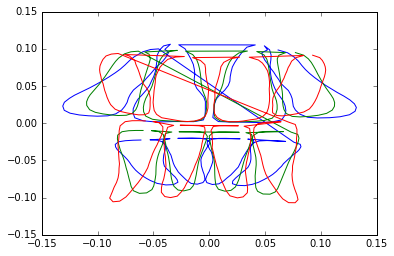

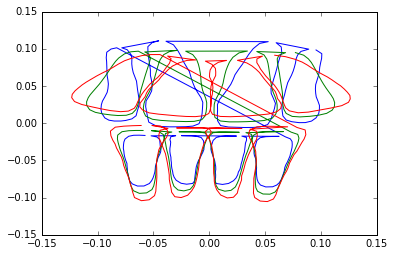

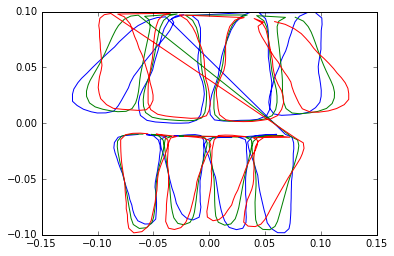

In [4]:
lc,mlc = data.get_training_image_landmarks(Dataset.ALL_TRAINING_IMAGES,Dataset.ALL_TEETH,True)
landmarks = lc + mlc
model = ShapeModel(landmarks)
plot_shapes(model.aligned_shapes())
#plot_shapes([model.mean_shape()])
plot_shapes(model.mode_shapes(1))
plot_shapes(model.mode_shapes(2))
plot_shapes(model.mode_shapes(3))

### Some edge detection and pyramids

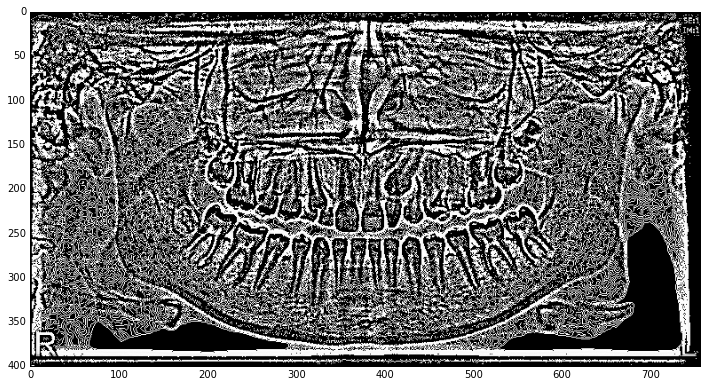

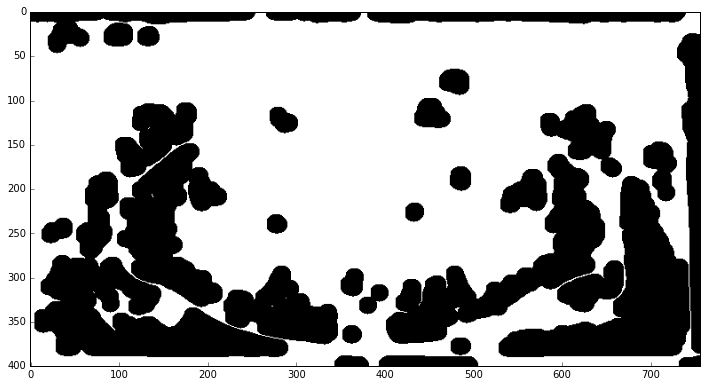

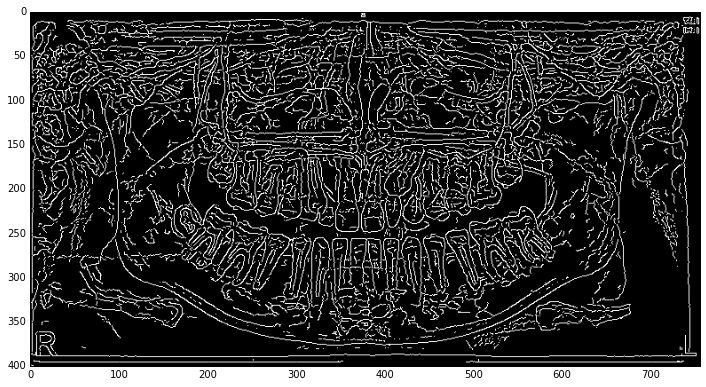

In [5]:
sample = cv2.pyrDown(cv2.pyrDown(data.get_extra_images([0])[0]))#[650:1300,1200:1800]
imshow2(cv2.Laplacian(cv2.bilateralFilter(sample,5,30,30),2))
imshow2(cv2.morphologyEx(cv2.Canny(cv2.bilateralFilter(sample,9,30,30),20,20),cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))))
imshow2(cv2.Canny(cv2.bilateralFilter(sample,5,30,30),10,20))

#### Shape normals

#### Grey Level pixels for the shape normals

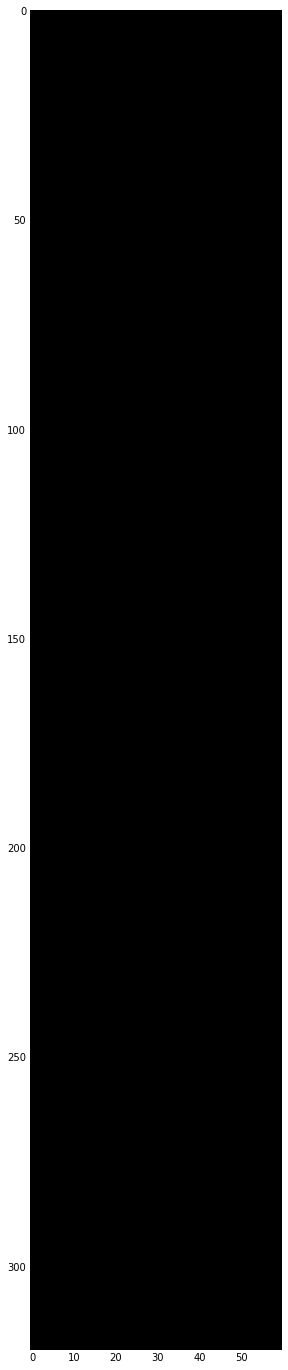

In [8]:
img,mimg = data.get_training_images(Dataset.ALL_TRAINING_IMAGES)
l,ml = data.get_training_image_landmarks(Dataset.ALL_TRAINING_IMAGES,Dataset.ALL_TEETH,combine=True)
images = img + mimg
shapes = l+ml
greymodel = GreyModel(images,shapes,number_of_pixels=30,normalize=True,use_gradient=True)
img = np.uint8([np.round(greymodel.get_point_grey_model(point_index).mean()) for point_index in range(greymodel.size())])
imshow2(img,width=24,height=24)

#### Fun with pyramids

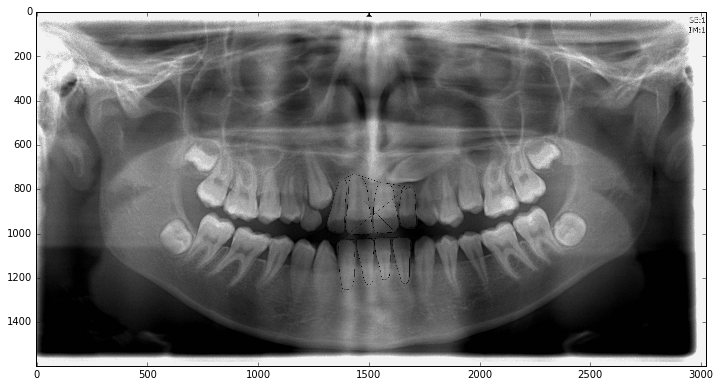

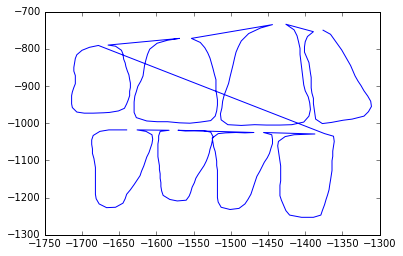

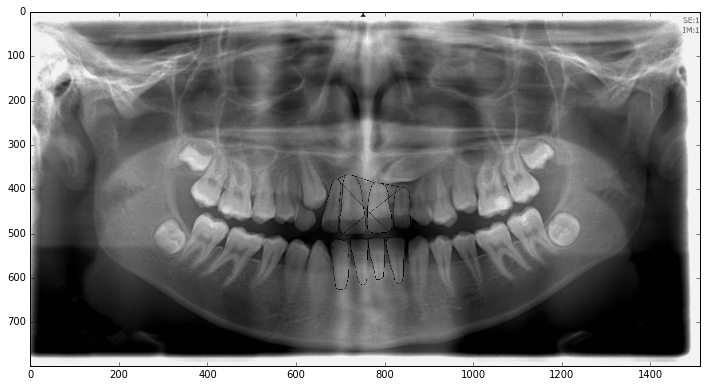

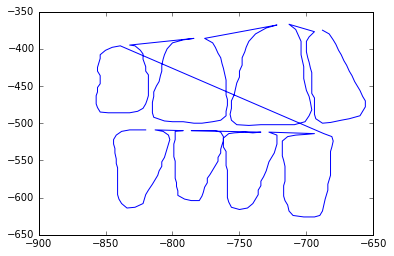

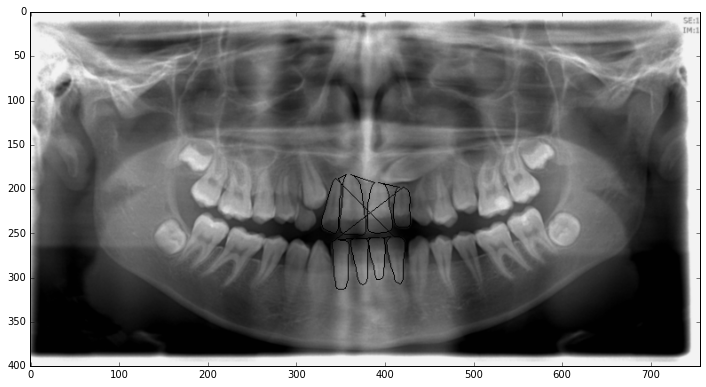

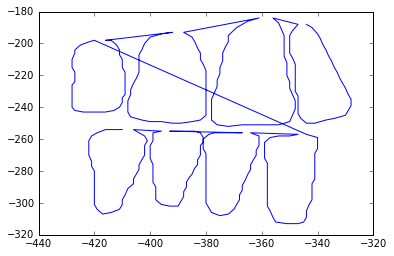

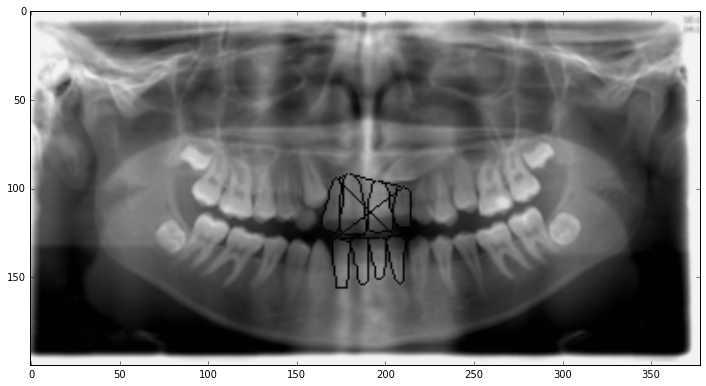

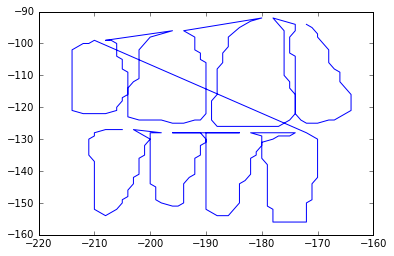

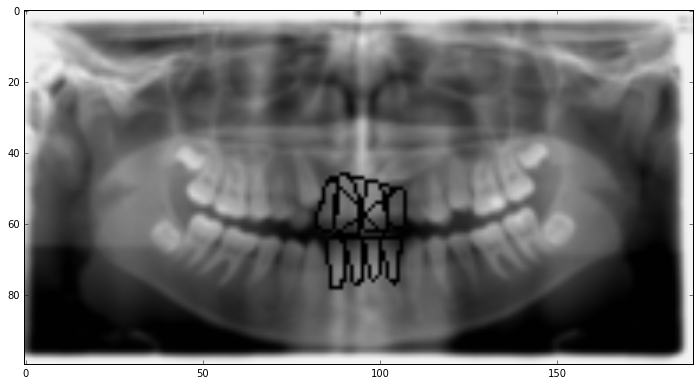

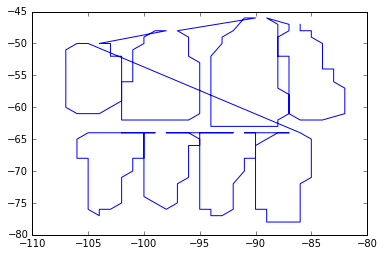

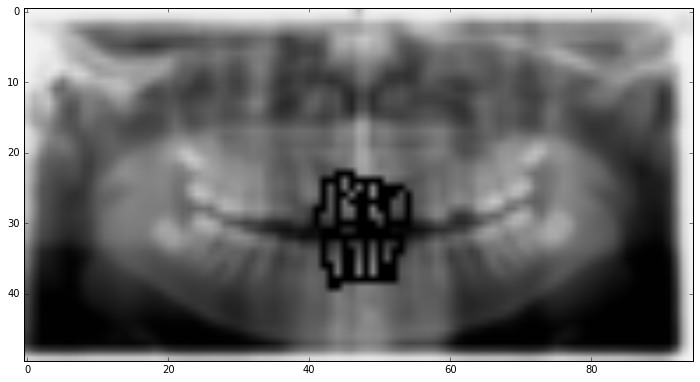

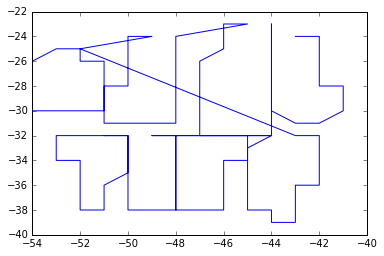

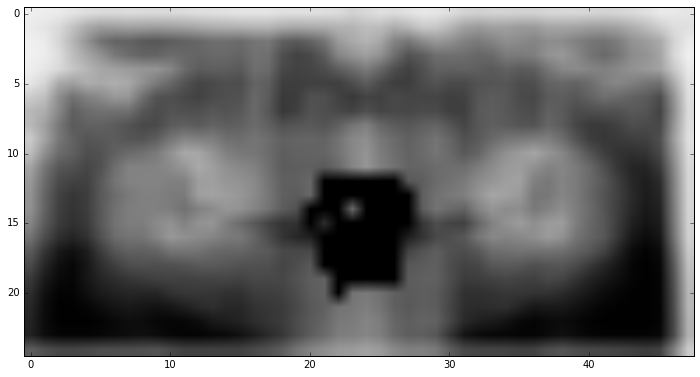

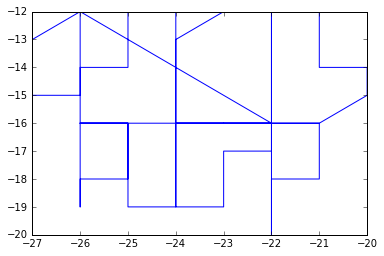

In [7]:
pimg = images[0]
shape = shapes[0]
for i in range(7):
    imshow2(overlay_shapes_on_image(pimg,[shape]))
    plot_shapes([shape])
    pimg = cv2.pyrDown(pimg)
    shape = shape.pyr_down()